# Week 6 - Introduction to Language Models

## Learning goals 🎯
1. Learn how to preprocess text data, including truncation, padding and encoding.
2. Learn an example of parameter-efficient fine-tuning approaches (e.g., prompt tuning [1]) with a seq2seq model (e.g., t5).
3. Understand the importance of word vector embeddings

<!-- 2. An example of prompting small language models (e.g., gpt-2). -->

## Table of Contents
- Representing meaning of words
- Task 0: Importing Libraries
- Task 1: Preprocessing
- Task 2: Model Configuration
- Task 3: Model Training
- Task 4: Test some examples

## Google Colab
This notebook is intended to be run on Google Colab. You can do so by clicking below:
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/mouraomiranda/COMP0189-practical-2024/blob/main/week-06/Week6_problems.ipynb)

## Representing meaning of words: word vectors and co-occurrence matrix methods
*acknowledgement: Manning's cs224n*



- Change in NLP landscape:
    - Past: ML approaches based on shallow linear models like SVM, logistic regression + Trained on very high dimensional and sparse features
    - Current: Deep learning architectures and neural networks + Trained on dense vector representations

- One-hot vectors idea doesn't encapsulate natural notion of similarity eg searching for "Seattle motel" hoping to match with "Seattle hotel" but not working since mathematically vectors are orthogonal

  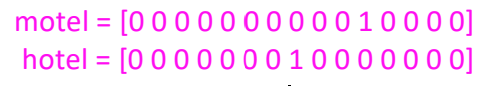


- Main idea: meaning of a particular word is better given by the context, neighbouring words
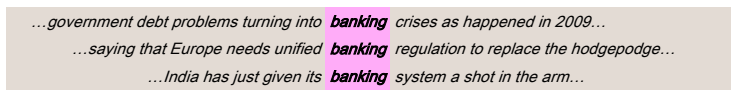

- Count-based co-occurrence matrix (window length=1; corpus: I like deep learning. I like NLP. I enjoy flying.
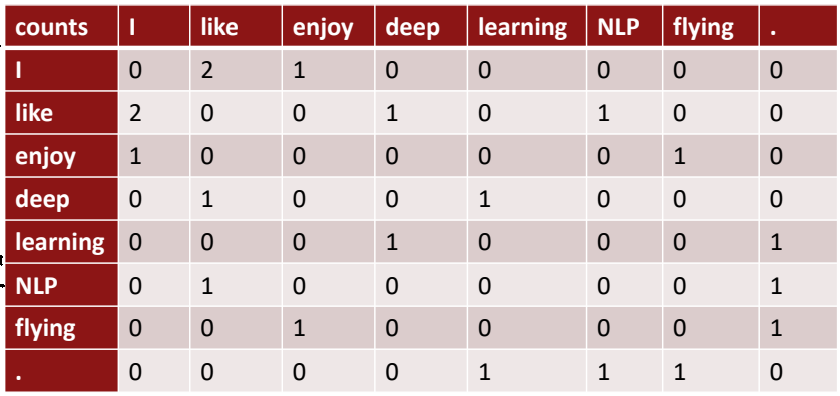

### Gensim word vector visualization of various word vectors
*acknowledgement Manning's CS224n course on NLP*

In [ ]:
import numpy as np

# Get the interactive Tools for Matplotlib
%matplotlib notebook
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from sklearn.decomposition import PCA

from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

Gensim is a package for for word and text similarity modeling.

Pennington et al. from Stanford came up with GloVe word vectors. Gensim doesn't give them first class support, but allows you to convert a file of GloVe vectors into word2vec format. You can download the GloVe vectors from [the Glove page](https://nlp.stanford.edu/projects/glove/). They're inside [this zip file](https://nlp.stanford.edu/data/glove.6B.zip)

(100d vectors are used below as a mix between speed and smallness vs. quality. If you try out the 50d vectors, they basically work for similarity but clearly aren't as good for analogy problems. If you load the 300d vectors, they're even better than the 100d vectors.)

In [ ]:
temp_path = !pwd
glove_path = temp_path[0] + None

In [ ]:
glove_file = datapath(glove_path)
word2vec_glove_file = get_tmpfile("glove.6B.100d.word2vec.txt")
glove2word2vec(glove_file, word2vec_glove_file)

(400000, 100)

In [ ]:
model = KeyedVectors.load_word2vec_format(word2vec_glove_file)

In [ ]:
model.most_similar('obama')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('barack', 0.937216579914093),
 ('bush', 0.927285373210907),
 ('clinton', 0.8960003852844238),
 ('mccain', 0.8875633478164673),
 ('gore', 0.8000321388244629),
 ('hillary', 0.7933663129806519),
 ('dole', 0.7851964235305786),
 ('rodham', 0.751889705657959),
 ('romney', 0.7488929629325867),
 ('kerry', 0.7472623586654663)]

In [ ]:
model.most_similar('banana')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('coconut', 0.7097253799438477),
 ('mango', 0.7054824233055115),
 ('bananas', 0.6887733936309814),
 ('potato', 0.6629636287689209),
 ('pineapple', 0.6534532904624939),
 ('fruit', 0.6519855260848999),
 ('peanut', 0.6420576572418213),
 ('pecan', 0.6349173188209534),
 ('cashew', 0.6294420957565308),
 ('papaya', 0.6246591210365295)]

In [ ]:
model.most_similar(negative='banana')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('keyrates', 0.7173938751220703),
 ('sungrebe', 0.7119239568710327),
 ('þórður', 0.7067720890045166),
 ('zety', 0.7056615352630615),
 ('23aou94', 0.6959497928619385),
 ('___________________________________________________________',
  0.694915235042572),
 ('elymians', 0.6945434212684631),
 ('camarina', 0.6927202939987183),
 ('ryryryryryry', 0.6905653476715088),
 ('maurilio', 0.6865653395652771)]

In [ ]:
result = model.most_similar(positive=['woman', 'king'], negative=['man'])
print("{}: {:.4f}".format(*result[0]))

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


queen: 0.7699


In [ ]:
def analogy(x1, x2, y1):
    result = model.most_similar(positive=[y1, x2], negative=[x1])
    return result[0][0]

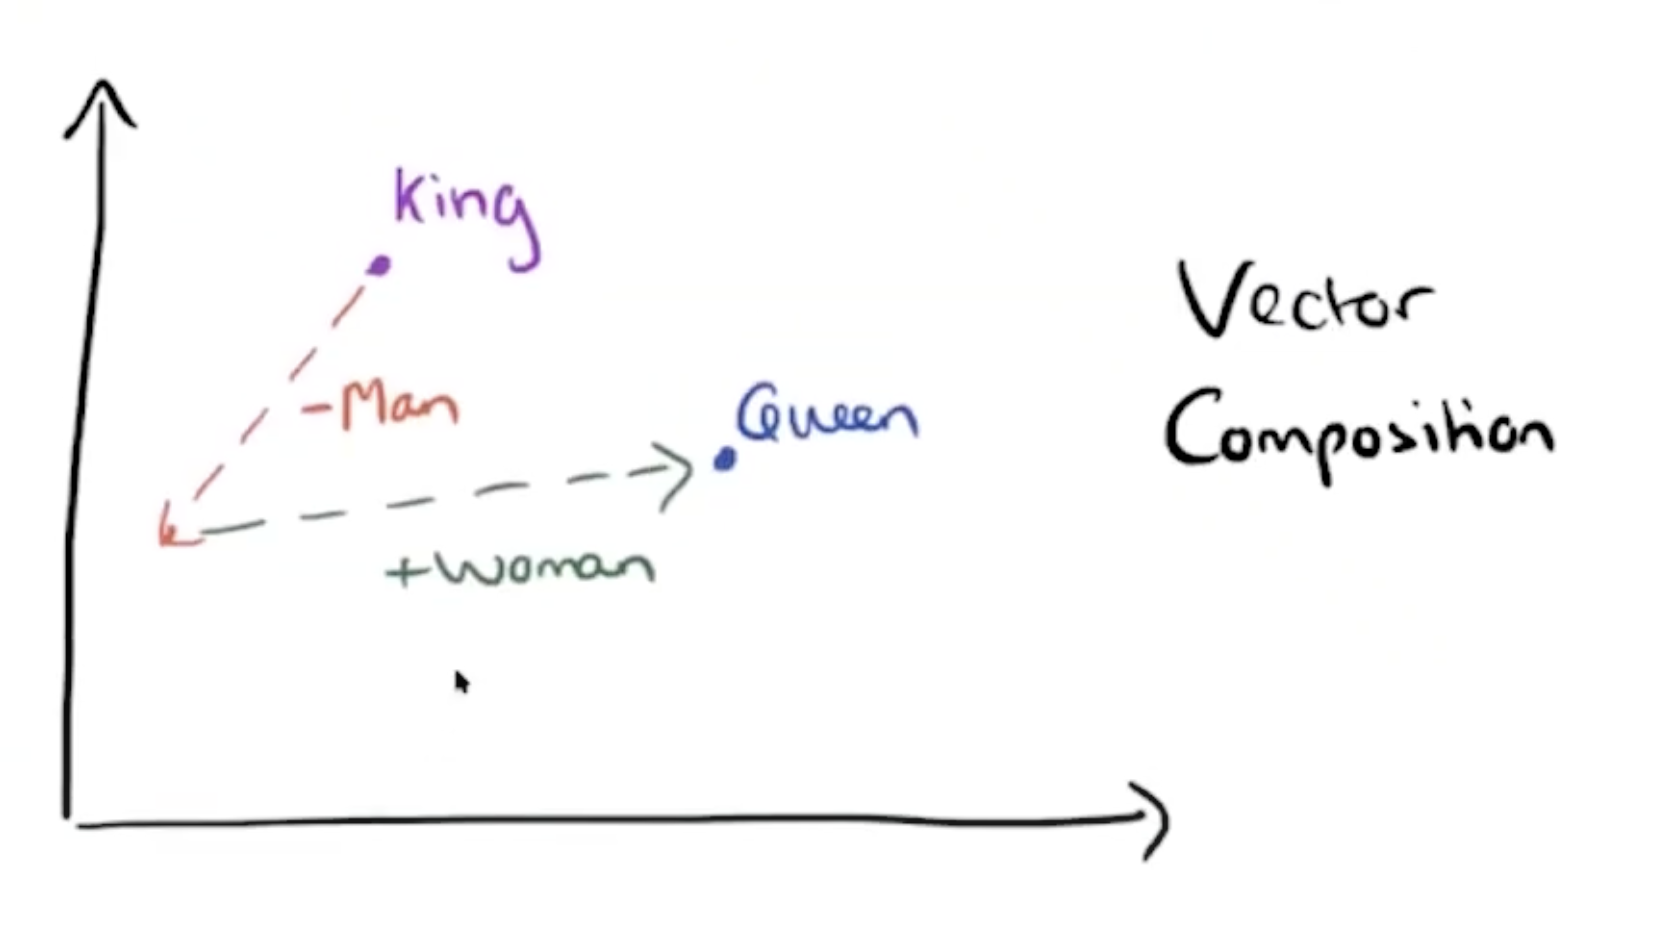

In [ ]:
analogy('japan', 'japanese', 'australia')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


'australian'

In [ ]:
analogy('australia', 'beer', 'france')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


'champagne'

In [ ]:
analogy('obama', 'clinton', 'reagan')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


'nixon'

In [ ]:
analogy('tall', 'tallest', 'long')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


'longest'

In [ ]:
analogy('good', 'fantastic', 'bad')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


'terrible'

In [ ]:
def display_pca_scatterplot(model, words=None, sample=0):
    if words == None:
        if sample > 0:
            words = np.random.choice(list(model.vocab.keys()), sample)
        else:
            words = [ word for word in model.vocab ]

    word_vectors = np.array([model[w] for w in words])

    twodim = PCA().fit_transform(word_vectors)[:,:2]

    plt.figure(figsize=(6,6))
    plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r')
    for word, (x,y) in zip(words, twodim):
        plt.text(x+0.05, y+0.05, word)

<IPython.core.display.Javascript object>


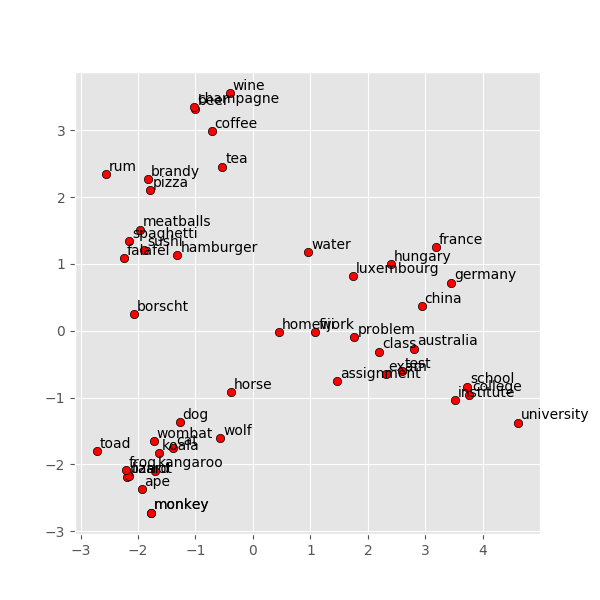

In [ ]:
display_pca_scatterplot(model,
                        ['coffee', 'tea', 'beer', 'wine', 'brandy', 'rum', 'champagne', 'water',
                         'spaghetti', 'borscht', 'hamburger', 'pizza', 'falafel', 'sushi', 'meatballs',
                         'dog', 'horse', 'cat', 'monkey', 'parrot', 'koala', 'lizard',
                         'frog', 'toad', 'monkey', 'ape', 'kangaroo', 'wombat', 'wolf',
                         'france', 'germany', 'hungary', 'luxembourg', 'australia', 'fiji', 'china',
                         'homework', 'assignment', 'problem', 'exam', 'test', 'class',
                         'school', 'college', 'university', 'institute'])

<IPython.core.display.Javascript object>


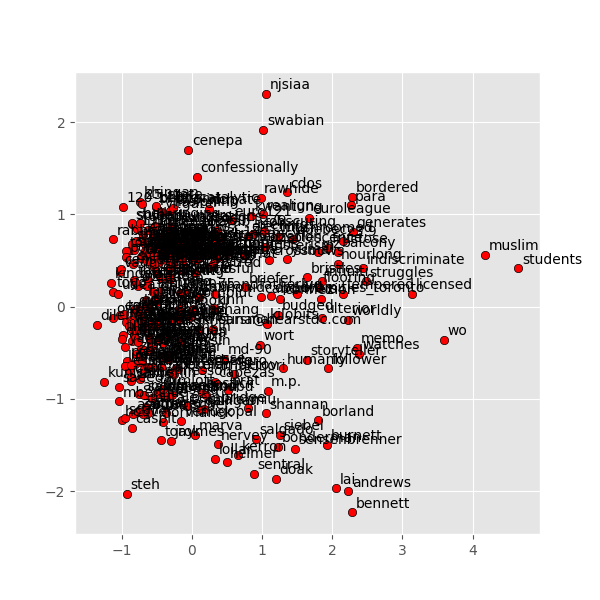

In [ ]:
display_pca_scatterplot(model, sample=300)

## Task 0. Importing Libraries

In [ ]:
# Uncomment the following line to install the PEFT package
# !pip install peft
!pip install datasets

In [ ]:
import os
import random
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

import torch
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer, default_data_collator, get_linear_schedule_with_warmup
from peft import get_peft_model, PromptTuningConfig, TaskType, PromptTuningInit
from torch.utils.data import DataLoader
from datasets import load_dataset

[2024-02-10 11:23:02,330] [INFO] [real_accelerator.py:191:get_accelerator] Setting ds_accelerator to cuda (auto detect)


In [ ]:

# Set the seed for reproducibility
def seed_torch(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)

seed = 42
seed_torch(seed)

# Task 1: Preprocessing

In [ ]:
# Loading dataset from huggingface
# Check it out at https://huggingface.co/datasets/financial_phrasebank/viewer/sentences_allagree
dataset = load_dataset("financial_phrasebank", "sentences_allagree")
# Splitting the dataset into train and test
dataset = dataset["train"].train_test_split(test_size=0.1)
print('The dataset has been loaded and split into train and test sets')
print('The structure of the dataset is as follows:')
print(dataset)
# Setting the original test set to be the validation set
dataset["validation"] = dataset["test"]
# Removing the original test set from the dataset
del dataset["test"]
print("\nThe example of the dataset: ", dataset["train"][0])

# Get all the classes in the dataset
classes = dataset["train"].features["label"].names
print("\nThe dataset has the following classes: ", classes)
print('\nThe final dataset has been created.')
print('The structure of the dataset is as follows:')
print(dataset)

The dataset has been loaded and split into train and test sets
The structure of the dataset is as follows:
DatasetDict({
    train: Dataset({
        features: ['sentence', 'label'],
        num_rows: 2037
    })
    test: Dataset({
        features: ['sentence', 'label'],
        num_rows: 227
    })
})

The example of the dataset:  {'sentence': 'The sales price was not disclosed .', 'label': 1}

The dataset has the following classes:  ['negative', 'neutral', 'positive']

The final dataset has been created.
The structure of the dataset is as follows:
DatasetDict({
    train: Dataset({
        features: ['sentence', 'label'],
        num_rows: 2037
    })
    validation: Dataset({
        features: ['sentence', 'label'],
        num_rows: 227
    })
})


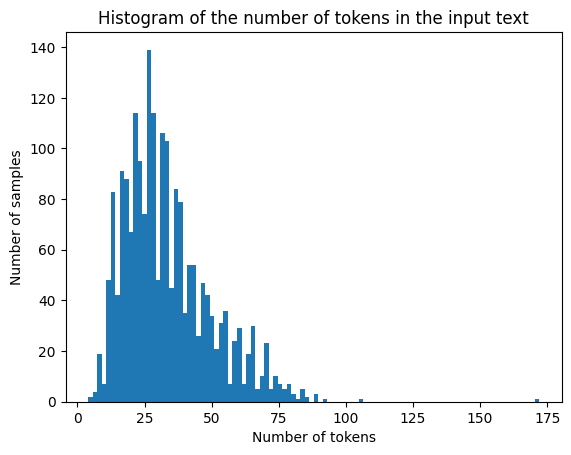

In [ ]:
model_name_or_path = "t5-small"
tokenizer_name_or_path = "t5-small"
tokenizer = AutoTokenizer.from_pretrained(model_name_or_path)
text_column = "sentence"
label_column = "text_label"
input_text = dataset["train"][text_column]
plt.hist(
    [len(tokenizer.encode(x, truncation=False)) for x in input_text],
    bins=100
)
plt.xlabel("Number of tokens")
plt.ylabel("Number of samples")
plt.title("Histogram of the number of tokens in the input text")
plt.show()

# data preprocessing
max_length = 128  # Set the maximum length of the input text, according to the histogram
batch_size = 8
target_max_length = max([len(tokenizer(class_label)["input_ids"]) for class_label in classes])

In [ ]:
def preprocess_function(examples):
    """ This function preprocesses the dataset by tokenizing the inputs and targets.

    Args:
        examples (dict): The dataset to be preprocessed.

    Returns:
        (dict): The preprocessed dataset (inputs and targets tokenized and formatted as model inputs and labels
    """
    inputs = examples[text_column]  # the model inputs in natural language
    targets = examples[label_column]  # the model targets in natural language
    model_inputs = tokenizer(
        inputs,  # the list of model inputs
        max_length=max_length,  # the maximum length of the model inputs
        padding="max_length",  # the padding method, here we pad to the maximum length
        truncation=True,  # truncate the inputs if they are longer than the maximum length
        return_tensors="pt",  # return the model inputs as PyTorch tensors
    )  # tokenize the inputs

    # Execrse 1: Tokenize the targetswq
    # Please follow the same steps as the inputs tokenization to tokenize the targets



    # End of Exercise 1

    # Extracting the input_ids to be used as labels
    labels = labels["input_ids"]
    # If we are padding here, replace all tokenizer.pad_token_id in the labels by -100
    # when we want to ignore padding in the loss.
    labels[labels == tokenizer.pad_token_id] = -100
    # Update the model inputs with the labels
    model_inputs["labels"] = labels
    return model_inputs


# Preprocessing the dataset by converting label ids (int) to label names (str)
dataset = dataset.map(
    lambda x: {"text_label": [classes[label] for label in x["label"]]},
    batched=True,
    num_proc=1,
)

# Preprocessing the dataset by tokenizing the inputs and targets
processed_datasets = dataset.map(
    preprocess_function,
    batched=True,
    num_proc=1,
    remove_columns=dataset["train"].column_names,
    load_from_cache_file=False,
    desc="Running tokenizer on dataset",
)

train_dataset = processed_datasets["train"]  # the training dataset
eval_dataset = processed_datasets["validation"]  # the validation dataset

train_dataloader = DataLoader(
    train_dataset, shuffle=True, collate_fn=default_data_collator, batch_size=batch_size, pin_memory=True
)  # the training dataloader
eval_dataloader = DataLoader(eval_dataset, collate_fn=default_data_collator, batch_size=batch_size, pin_memory=True)  # the validation dataloader

Running tokenizer on dataset:   0%|          | 0/2037 [00:00<?, ? examples/s]

Running tokenizer on dataset:   0%|          | 0/227 [00:00<?, ? examples/s]

# Task 2: Model Configuration

### 2.1 How to choose the number of virtual tokens for prompt tuning?
Recent studies [1,2,3,4,5,6,7,8,9] typically use soft prompts with a default length exceeding 100 virtual tokens. For example, a direct quote from [5] states that "for hard sequence tasks, usually, a longer prompt than 100 would be helpful".

### 2.2 How to choose learning rate for prompt tuning?
Prompt Tuning typically uses a larger learning rate than the full model fine-tuning. Specifically, the learning rate for prompt tuning is typically 1e-3 or 1e-4, while the learning rate for full model fine-tuning is typically 1e-5 or 1e-6.

### 2.3 How to choose the number of training steps (epoch) for prompt tuning?
Training more steps is typically good for prompt tuning. For example, when the number of virtual tokens is 100, [1] uses 30k steps for prompt tuning, while [3,9] increases the number of steps to approximately 300k steps. In the few-shot setting, pre-training the soft prompts on the source tasks [2,3,4,7,8,9] can reduce the number of steps and speed up the convergence, which is also known as parameter-efficient transfer learning.

In [ ]:
# Training Configuration
device = "cuda" if torch.cuda.is_available() else "cpu"
num_virtual_token = 30  # Here we set the virtual token to be 30 for the sake of the example
lr = 0.3  # Prompt Tuning typically uses a larger learning rate than the full model fine-tuning
num_epochs = 50  # Please feel free to reduce the number of epochs if the training time is too long. Set it to 1 or 3 for a quick test

In [ ]:
# Creating parameter-efficient fine-tuning configuration
# Here we select Prompt Tuning
peft_config = PromptTuningConfig(
    task_type=TaskType.SEQ_2_SEQ_LM,  # We select SEQ_2_SEQ_LM since the T5 model is a sequence-to-sequence model
    prompt_tuning_init=PromptTuningInit.TEXT,
    num_virtual_tokens=num_virtual_token,
    prompt_tuning_init_text="What is the sentiment of this article?\n",  # The prompt text, initialise the soft prompt with learned word embeddings, rather than random initialisation
    inference_mode=False,
    tokenizer_name_or_path=model_name_or_path,
)

model = AutoModelForSeq2SeqLM.from_pretrained(None)  # Load the model
model = get_peft_model(None)  # Get the PEFT model
model.print_trainable_parameters()  # Print the trainable parameters
model  # Display the model architecture

trainable params: 30,720 || all params: 60,537,344 || trainable%: 0.050745536507184726


PeftModelForSeq2SeqLM(
  (base_model): T5ForConditionalGeneration(
    (shared): Embedding(32128, 512)
    (encoder): T5Stack(
      (embed_tokens): Embedding(32128, 512)
      (block): ModuleList(
        (0): T5Block(
          (layer): ModuleList(
            (0): T5LayerSelfAttention(
              (SelfAttention): T5Attention(
                (q): Linear(in_features=512, out_features=512, bias=False)
                (k): Linear(in_features=512, out_features=512, bias=False)
                (v): Linear(in_features=512, out_features=512, bias=False)
                (o): Linear(in_features=512, out_features=512, bias=False)
                (relative_attention_bias): Embedding(32, 8)
              )
              (layer_norm): T5LayerNorm()
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (1): T5LayerFF(
              (DenseReluDense): T5DenseActDense(
                (wi): Linear(in_features=512, out_features=2048, bias=False)
                (wo): Lin

In [ ]:
# Set up optimizer and lr scheduler
optimizer = torch.optim.AdamW(model.parameters(), lr=lr)
# The learning rate scheduler
lr_scheduler = get_linear_schedule_with_warmup(
    optimizer=optimizer,
    num_warmup_steps=0,
    num_training_steps=(len(train_dataloader) * num_epochs),  # The number of training steps
)

# Task 3: Model Training

In [ ]:
# training and evaluation
model = model.to(device)  # move the model to the GPU if available

train_loss_list = []  # record the training loss for each epoch
eval_loss_list = []  # record the evaluation loss for each epoch

for epoch in range(num_epochs):
    model.train()  # set the model to training mode
    total_loss = 0  # accumulate the total loss
    for step, batch in enumerate(tqdm(train_dataloader)):
        batch = {k: v.to(device) for k, v in batch.items()}  # move the batch to the GPU if available
        outputs = model(**batch)  # forward pass
        loss = outputs.loss  # compute the loss
        total_loss += loss.detach().float()  # accumulate the total loss
        # Execrise 3:
        # Please implement (1) Backward pass, (2) update the model weights, (3) update the learning rate, and (4) set the gradients to zero



        # End of Exercise 3

    model.eval()  # set the model to evaluation mode
    eval_loss = 0  # accumulate the evaluation loss
    eval_preds = []  # accumulate the evaluation predictions
    for step, batch in enumerate(tqdm(eval_dataloader)):
        batch = {k: v.to(device) for k, v in batch.items()}  # move the batch to the GPU if available
        with torch.no_grad():  # disable gradient computation
            outputs = model(**batch)  # forward pass
        loss = outputs.loss  # compute the loss
        eval_loss += loss.detach().float()  # accumulate the evaluation loss
        eval_preds.extend(
            tokenizer.batch_decode(torch.argmax(outputs.logits, -1).detach().cpu().numpy(), skip_special_tokens=True)
        )  # accumulate the evaluation predictions

    eval_epoch_loss = eval_loss / len(eval_dataloader)  # compute the evaluation loss
    eval_ppl = torch.exp(eval_epoch_loss)  # compute the evaluation perplexity
    train_epoch_loss = total_loss / len(train_dataloader)  # compute the training loss
    train_ppl = torch.exp(train_epoch_loss)  # compute the training perplexity
    print(f"{epoch=}: {train_ppl=} {train_epoch_loss=} {eval_ppl=} {eval_epoch_loss=}")

    train_loss_list.append(train_epoch_loss.detach().cpu().item())  # record the training loss
    eval_loss_list.append(eval_epoch_loss.detach().cpu().item())  # record the evaluation loss

100%|██████████| 29/29 [00:00<00:00, 106.59it/s]


epoch=0: train_ppl=tensor(3.0200, device='cuda:0') train_epoch_loss=tensor(1.1053, device='cuda:0') eval_ppl=tensor(1.4001, device='cuda:0') eval_epoch_loss=tensor(0.3365, device='cuda:0')


100%|██████████| 29/29 [00:00<00:00, 110.94it/s]


epoch=1: train_ppl=tensor(1.5580, device='cuda:0') train_epoch_loss=tensor(0.4434, device='cuda:0') eval_ppl=tensor(1.2876, device='cuda:0') eval_epoch_loss=tensor(0.2528, device='cuda:0')


100%|██████████| 29/29 [00:00<00:00, 110.87it/s]


epoch=2: train_ppl=tensor(1.4677, device='cuda:0') train_epoch_loss=tensor(0.3837, device='cuda:0') eval_ppl=tensor(1.2351, device='cuda:0') eval_epoch_loss=tensor(0.2112, device='cuda:0')


100%|██████████| 29/29 [00:00<00:00, 110.93it/s]


epoch=3: train_ppl=tensor(1.4051, device='cuda:0') train_epoch_loss=tensor(0.3401, device='cuda:0') eval_ppl=tensor(1.3038, device='cuda:0') eval_epoch_loss=tensor(0.2653, device='cuda:0')


100%|██████████| 29/29 [00:00<00:00, 110.88it/s]


epoch=4: train_ppl=tensor(1.3888, device='cuda:0') train_epoch_loss=tensor(0.3285, device='cuda:0') eval_ppl=tensor(1.2546, device='cuda:0') eval_epoch_loss=tensor(0.2268, device='cuda:0')


100%|██████████| 29/29 [00:00<00:00, 110.85it/s]


epoch=5: train_ppl=tensor(1.3308, device='cuda:0') train_epoch_loss=tensor(0.2858, device='cuda:0') eval_ppl=tensor(1.1814, device='cuda:0') eval_epoch_loss=tensor(0.1667, device='cuda:0')


100%|██████████| 29/29 [00:00<00:00, 110.91it/s]


epoch=6: train_ppl=tensor(1.3538, device='cuda:0') train_epoch_loss=tensor(0.3029, device='cuda:0') eval_ppl=tensor(1.1843, device='cuda:0') eval_epoch_loss=tensor(0.1692, device='cuda:0')


100%|██████████| 29/29 [00:00<00:00, 110.85it/s]


epoch=7: train_ppl=tensor(1.3106, device='cuda:0') train_epoch_loss=tensor(0.2705, device='cuda:0') eval_ppl=tensor(1.1947, device='cuda:0') eval_epoch_loss=tensor(0.1779, device='cuda:0')


100%|██████████| 29/29 [00:00<00:00, 110.75it/s]


epoch=8: train_ppl=tensor(1.2970, device='cuda:0') train_epoch_loss=tensor(0.2600, device='cuda:0') eval_ppl=tensor(1.2637, device='cuda:0') eval_epoch_loss=tensor(0.2341, device='cuda:0')


100%|██████████| 29/29 [00:00<00:00, 110.88it/s]


epoch=9: train_ppl=tensor(1.3574, device='cuda:0') train_epoch_loss=tensor(0.3056, device='cuda:0') eval_ppl=tensor(1.1975, device='cuda:0') eval_epoch_loss=tensor(0.1802, device='cuda:0')


100%|██████████| 29/29 [00:00<00:00, 109.18it/s]


epoch=10: train_ppl=tensor(1.3190, device='cuda:0') train_epoch_loss=tensor(0.2769, device='cuda:0') eval_ppl=tensor(1.1469, device='cuda:0') eval_epoch_loss=tensor(0.1370, device='cuda:0')


100%|██████████| 29/29 [00:00<00:00, 110.87it/s]


epoch=11: train_ppl=tensor(1.3069, device='cuda:0') train_epoch_loss=tensor(0.2677, device='cuda:0') eval_ppl=tensor(1.2722, device='cuda:0') eval_epoch_loss=tensor(0.2408, device='cuda:0')


100%|██████████| 29/29 [00:00<00:00, 110.85it/s]


epoch=12: train_ppl=tensor(1.3014, device='cuda:0') train_epoch_loss=tensor(0.2635, device='cuda:0') eval_ppl=tensor(1.1884, device='cuda:0') eval_epoch_loss=tensor(0.1726, device='cuda:0')


100%|██████████| 29/29 [00:00<00:00, 111.07it/s]


epoch=13: train_ppl=tensor(1.2649, device='cuda:0') train_epoch_loss=tensor(0.2350, device='cuda:0') eval_ppl=tensor(1.1898, device='cuda:0') eval_epoch_loss=tensor(0.1737, device='cuda:0')


100%|██████████| 29/29 [00:00<00:00, 110.79it/s]


epoch=14: train_ppl=tensor(1.2871, device='cuda:0') train_epoch_loss=tensor(0.2524, device='cuda:0') eval_ppl=tensor(1.2076, device='cuda:0') eval_epoch_loss=tensor(0.1886, device='cuda:0')


100%|██████████| 29/29 [00:00<00:00, 110.70it/s]


epoch=15: train_ppl=tensor(1.2823, device='cuda:0') train_epoch_loss=tensor(0.2486, device='cuda:0') eval_ppl=tensor(1.2578, device='cuda:0') eval_epoch_loss=tensor(0.2294, device='cuda:0')


100%|██████████| 29/29 [00:00<00:00, 111.05it/s]


epoch=16: train_ppl=tensor(1.2773, device='cuda:0') train_epoch_loss=tensor(0.2447, device='cuda:0') eval_ppl=tensor(1.2130, device='cuda:0') eval_epoch_loss=tensor(0.1931, device='cuda:0')


100%|██████████| 29/29 [00:00<00:00, 110.88it/s]


epoch=17: train_ppl=tensor(1.2922, device='cuda:0') train_epoch_loss=tensor(0.2563, device='cuda:0') eval_ppl=tensor(1.2218, device='cuda:0') eval_epoch_loss=tensor(0.2003, device='cuda:0')


100%|██████████| 29/29 [00:00<00:00, 111.08it/s]


epoch=18: train_ppl=tensor(1.3416, device='cuda:0') train_epoch_loss=tensor(0.2939, device='cuda:0') eval_ppl=tensor(1.1875, device='cuda:0') eval_epoch_loss=tensor(0.1718, device='cuda:0')


100%|██████████| 29/29 [00:00<00:00, 110.89it/s]


epoch=19: train_ppl=tensor(1.2826, device='cuda:0') train_epoch_loss=tensor(0.2489, device='cuda:0') eval_ppl=tensor(1.2290, device='cuda:0') eval_epoch_loss=tensor(0.2062, device='cuda:0')


100%|██████████| 29/29 [00:00<00:00, 111.00it/s]


epoch=20: train_ppl=tensor(1.2820, device='cuda:0') train_epoch_loss=tensor(0.2484, device='cuda:0') eval_ppl=tensor(1.2142, device='cuda:0') eval_epoch_loss=tensor(0.1941, device='cuda:0')


100%|██████████| 29/29 [00:00<00:00, 110.91it/s]


epoch=21: train_ppl=tensor(1.2977, device='cuda:0') train_epoch_loss=tensor(0.2606, device='cuda:0') eval_ppl=tensor(1.1806, device='cuda:0') eval_epoch_loss=tensor(0.1660, device='cuda:0')


100%|██████████| 29/29 [00:00<00:00, 110.95it/s]


epoch=22: train_ppl=tensor(1.2711, device='cuda:0') train_epoch_loss=tensor(0.2399, device='cuda:0') eval_ppl=tensor(1.2235, device='cuda:0') eval_epoch_loss=tensor(0.2017, device='cuda:0')


100%|██████████| 29/29 [00:00<00:00, 110.94it/s]


epoch=23: train_ppl=tensor(1.2594, device='cuda:0') train_epoch_loss=tensor(0.2306, device='cuda:0') eval_ppl=tensor(1.2036, device='cuda:0') eval_epoch_loss=tensor(0.1853, device='cuda:0')


100%|██████████| 29/29 [00:00<00:00, 111.04it/s]


epoch=24: train_ppl=tensor(1.2612, device='cuda:0') train_epoch_loss=tensor(0.2321, device='cuda:0') eval_ppl=tensor(1.2071, device='cuda:0') eval_epoch_loss=tensor(0.1882, device='cuda:0')


100%|██████████| 29/29 [00:00<00:00, 111.08it/s]


epoch=25: train_ppl=tensor(1.2503, device='cuda:0') train_epoch_loss=tensor(0.2234, device='cuda:0') eval_ppl=tensor(1.2669, device='cuda:0') eval_epoch_loss=tensor(0.2366, device='cuda:0')


100%|██████████| 29/29 [00:00<00:00, 110.90it/s]


epoch=26: train_ppl=tensor(1.2131, device='cuda:0') train_epoch_loss=tensor(0.1932, device='cuda:0') eval_ppl=tensor(1.1994, device='cuda:0') eval_epoch_loss=tensor(0.1818, device='cuda:0')


100%|██████████| 29/29 [00:00<00:00, 110.88it/s]


epoch=27: train_ppl=tensor(1.2831, device='cuda:0') train_epoch_loss=tensor(0.2493, device='cuda:0') eval_ppl=tensor(1.1780, device='cuda:0') eval_epoch_loss=tensor(0.1638, device='cuda:0')


100%|██████████| 29/29 [00:00<00:00, 110.82it/s]


epoch=28: train_ppl=tensor(1.2450, device='cuda:0') train_epoch_loss=tensor(0.2192, device='cuda:0') eval_ppl=tensor(1.1541, device='cuda:0') eval_epoch_loss=tensor(0.1433, device='cuda:0')


100%|██████████| 29/29 [00:00<00:00, 111.21it/s]


epoch=29: train_ppl=tensor(1.2295, device='cuda:0') train_epoch_loss=tensor(0.2066, device='cuda:0') eval_ppl=tensor(1.1533, device='cuda:0') eval_epoch_loss=tensor(0.1426, device='cuda:0')


100%|██████████| 29/29 [00:00<00:00, 111.12it/s]


epoch=30: train_ppl=tensor(1.2638, device='cuda:0') train_epoch_loss=tensor(0.2341, device='cuda:0') eval_ppl=tensor(1.1714, device='cuda:0') eval_epoch_loss=tensor(0.1582, device='cuda:0')


100%|██████████| 29/29 [00:00<00:00, 110.98it/s]


epoch=31: train_ppl=tensor(1.2351, device='cuda:0') train_epoch_loss=tensor(0.2111, device='cuda:0') eval_ppl=tensor(1.1867, device='cuda:0') eval_epoch_loss=tensor(0.1712, device='cuda:0')


100%|██████████| 29/29 [00:00<00:00, 111.11it/s]


epoch=32: train_ppl=tensor(1.2369, device='cuda:0') train_epoch_loss=tensor(0.2126, device='cuda:0') eval_ppl=tensor(1.2285, device='cuda:0') eval_epoch_loss=tensor(0.2058, device='cuda:0')


100%|██████████| 29/29 [00:00<00:00, 111.10it/s]


epoch=33: train_ppl=tensor(1.2284, device='cuda:0') train_epoch_loss=tensor(0.2057, device='cuda:0') eval_ppl=tensor(1.1666, device='cuda:0') eval_epoch_loss=tensor(0.1541, device='cuda:0')


100%|██████████| 29/29 [00:00<00:00, 110.83it/s]


epoch=34: train_ppl=tensor(1.2167, device='cuda:0') train_epoch_loss=tensor(0.1962, device='cuda:0') eval_ppl=tensor(1.1593, device='cuda:0') eval_epoch_loss=tensor(0.1478, device='cuda:0')


100%|██████████| 29/29 [00:00<00:00, 110.76it/s]


epoch=35: train_ppl=tensor(1.1877, device='cuda:0') train_epoch_loss=tensor(0.1720, device='cuda:0') eval_ppl=tensor(1.1742, device='cuda:0') eval_epoch_loss=tensor(0.1606, device='cuda:0')


100%|██████████| 29/29 [00:00<00:00, 110.87it/s]


epoch=36: train_ppl=tensor(1.2042, device='cuda:0') train_epoch_loss=tensor(0.1858, device='cuda:0') eval_ppl=tensor(1.2713, device='cuda:0') eval_epoch_loss=tensor(0.2401, device='cuda:0')


100%|██████████| 29/29 [00:00<00:00, 110.88it/s]


epoch=37: train_ppl=tensor(1.2311, device='cuda:0') train_epoch_loss=tensor(0.2079, device='cuda:0') eval_ppl=tensor(1.1697, device='cuda:0') eval_epoch_loss=tensor(0.1567, device='cuda:0')


100%|██████████| 29/29 [00:00<00:00, 110.99it/s]


epoch=38: train_ppl=tensor(1.2146, device='cuda:0') train_epoch_loss=tensor(0.1944, device='cuda:0') eval_ppl=tensor(1.1693, device='cuda:0') eval_epoch_loss=tensor(0.1564, device='cuda:0')


100%|██████████| 29/29 [00:00<00:00, 110.71it/s]


epoch=39: train_ppl=tensor(1.2053, device='cuda:0') train_epoch_loss=tensor(0.1868, device='cuda:0') eval_ppl=tensor(1.1996, device='cuda:0') eval_epoch_loss=tensor(0.1820, device='cuda:0')


100%|██████████| 29/29 [00:00<00:00, 110.86it/s]


epoch=40: train_ppl=tensor(1.1862, device='cuda:0') train_epoch_loss=tensor(0.1708, device='cuda:0') eval_ppl=tensor(1.1740, device='cuda:0') eval_epoch_loss=tensor(0.1605, device='cuda:0')


100%|██████████| 29/29 [00:00<00:00, 110.59it/s]


epoch=41: train_ppl=tensor(1.1799, device='cuda:0') train_epoch_loss=tensor(0.1655, device='cuda:0') eval_ppl=tensor(1.1589, device='cuda:0') eval_epoch_loss=tensor(0.1475, device='cuda:0')


100%|██████████| 29/29 [00:00<00:00, 110.98it/s]


epoch=42: train_ppl=tensor(1.1697, device='cuda:0') train_epoch_loss=tensor(0.1568, device='cuda:0') eval_ppl=tensor(1.1514, device='cuda:0') eval_epoch_loss=tensor(0.1410, device='cuda:0')


100%|██████████| 29/29 [00:00<00:00, 110.86it/s]


epoch=43: train_ppl=tensor(1.1790, device='cuda:0') train_epoch_loss=tensor(0.1646, device='cuda:0') eval_ppl=tensor(1.1885, device='cuda:0') eval_epoch_loss=tensor(0.1727, device='cuda:0')


100%|██████████| 29/29 [00:00<00:00, 110.87it/s]


epoch=44: train_ppl=tensor(1.1471, device='cuda:0') train_epoch_loss=tensor(0.1372, device='cuda:0') eval_ppl=tensor(1.1471, device='cuda:0') eval_epoch_loss=tensor(0.1372, device='cuda:0')


100%|██████████| 29/29 [00:00<00:00, 110.81it/s]


epoch=45: train_ppl=tensor(1.1366, device='cuda:0') train_epoch_loss=tensor(0.1281, device='cuda:0') eval_ppl=tensor(1.1390, device='cuda:0') eval_epoch_loss=tensor(0.1301, device='cuda:0')


100%|██████████| 29/29 [00:00<00:00, 110.96it/s]


epoch=46: train_ppl=tensor(1.1300, device='cuda:0') train_epoch_loss=tensor(0.1222, device='cuda:0') eval_ppl=tensor(1.1541, device='cuda:0') eval_epoch_loss=tensor(0.1433, device='cuda:0')


100%|██████████| 29/29 [00:00<00:00, 110.91it/s]


epoch=47: train_ppl=tensor(1.1328, device='cuda:0') train_epoch_loss=tensor(0.1247, device='cuda:0') eval_ppl=tensor(1.1545, device='cuda:0') eval_epoch_loss=tensor(0.1436, device='cuda:0')


100%|██████████| 29/29 [00:00<00:00, 111.04it/s]


epoch=48: train_ppl=tensor(1.1333, device='cuda:0') train_epoch_loss=tensor(0.1252, device='cuda:0') eval_ppl=tensor(1.1385, device='cuda:0') eval_epoch_loss=tensor(0.1297, device='cuda:0')


100%|██████████| 29/29 [00:00<00:00, 110.86it/s]

epoch=49: train_ppl=tensor(1.1308, device='cuda:0') train_epoch_loss=tensor(0.1230, device='cuda:0') eval_ppl=tensor(1.1257, device='cuda:0') eval_epoch_loss=tensor(0.1184, device='cuda:0')


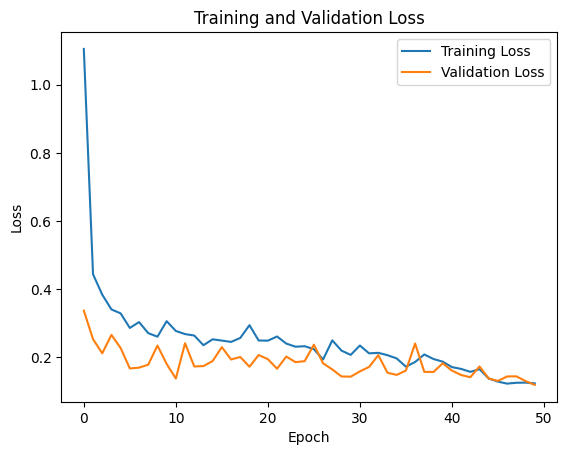

In [ ]:
# Plot training loss and validation loss
plt.plot(train_loss_list, label="Training Loss")
plt.plot(eval_loss_list, label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

In [ ]:
# print accuracy
correct = 0  # the number of correct predictions
total = 0  # the total number of predictions
for pred, true in zip(eval_preds, dataset["validation"]["text_label"]):
    if pred.strip() == true.strip():  # compare the predicted label with the true label
        correct += 1
    total += 1
accuracy = correct / total * 100
print(f"{accuracy=} % on the evaluation dataset")
print(f"{eval_preds[:10]=}")
print(f"{dataset['validation']['text_label'][:10]=}")

accuracy=92.07048458149781 % on the evaluation dataset
eval_preds[:10]=['neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral']
dataset['validation']['text_label'][:10]=['neutral', 'neutral', 'neutral', 'positive', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral']


In [ ]:
# saving model
peft_model_id = f"./{model_name_or_path}_{peft_config.peft_type}_{peft_config.task_type}"
print(f"Saving model to {peft_model_id}")
model.save_pretrained(peft_model_id)

Saving model to ./t5-small_PROMPT_TUNING_SEQ_2_SEQ_LM


In [ ]:
# Checking the size of checkpoints
ckpt = f"{peft_model_id}/adapter_model.*"  # The path to the checkpoint
!du -h $ckpt  # Check the size of the checkpoint

124K	./t5-small_PROMPT_TUNING_SEQ_2_SEQ_LM/adapter_model.safetensors


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


# Task 4: Test some examples

In [ ]:
model.eval()  # set the model to evaluation mode
test_example = "London is a great city, and I love studying at University College London."
input_ids = tokenizer(test_example, return_tensors="pt").input_ids
input_ids = input_ids.to(model.device)
print(f"Input Text: {test_example}")
print(f"Input IDs: {input_ids}")

with torch.no_grad():
    outputs = model.generate(input_ids=input_ids, max_new_tokens=10)
    print(f"Output IDs: {outputs}")
    prediction = tokenizer.None
    print("The sentiment of the sentence is:", prediction[0])

Input Text: London is a great city, and I love studying at University College London.
Input IDs: tensor([[1524,   19,    3,    9,  248,  690,    6,   11,   27,  333, 6908,   44,
          636, 1888, 1524,    5,    1]], device='cuda:0')
Output IDs: tensor([[   0, 7163,    1]], device='cuda:0')
The sentiment of the sentence is: neutral


## References:
[1] The Power of Scale for Parameter-Efficient Prompt Tuning. EMNLP 2021.

[2] On Transferability of Prompt Tuning for Natural Language Processing. NAACL 2022.

[3] SPoT: Better Frozen Model Adaptation through Soft Prompt Transfer. ACL 2022.

[4] PPT: Pre-trained Prompt Tuning for Few-shot Learning. ACL 2022.

[5] P-Tuning: Prompt Tuning Can Be Comparable to Fine-tuning Across Scales and Tasks. ACL 2022.

[6] PSP: Pre-trained Soft Prompts for Few-Shot Abstractive Summarization. COLING 2022.

[7] ATTEMPT: Parameter-Efficient Multi-task Tuning via Attentional Mixtures of Soft Prompts. EMNLP 2022.

[8] Multitask Prompt Tuning Enables Parameter-Efficient Transfer Learning. ICLR 2023.

[9] DePT: Decomposed Prompt Tuning for Parameter-Efficient Fine-tuning. ICLR 2024.

# Acknowledgement
This notebook is inspired by the following resources:
- [HuggingFace: Tokenizer](https://huggingface.co/transformers/main_classes/tokenizer.html)
- [HuggingFace: T5](https://huggingface.co/transformers/model_doc/t5.html)
- [HuggingFace: PEFT Example](https://huggingface.co/transformers/master/peft.html)